# <center> Предсказание победителя в Dota 2
<center> <img src="https://meduza.io/impro/YnJZAHUW6WHz_JQm1uRPkTql_qAhbfxt3oFJLGH7CJg/fill/980/0/ce/1/aHR0cHM6Ly9tZWR1/emEuaW8vaW1hZ2Uv/YXR0YWNobWVudHMv/aW1hZ2VzLzAwNy8x/NTcvNjk1L29yaWdp/bmFsL0tMVThLbUti/ZG5pSzlibDA0Wmlw/WXcuanBn.webp" width="700" height="700">

[Почитать подбробнее](https://meduza.io/feature/2021/10/19/rossiyskaya-komanda-vyigrala-chempionat-mira-po-dota-2-i-poluchila-18-millionov-dollarov-postoyte-otkuda-takie-dengi-neuzheli-igrat-v-dotu-tak-slozhno)

#### [Оригинальная статья](https://arxiv.org/pdf/2106.01782.pdf)
    
### Начало

Посмотрим на готовые признаки и сделаем первую посылку. 

1. [Описание данных](#Описание-данных)
2. [Описание признаков](#Описание-признаков)
3. [Наша первая модель](#Наша-первая-модель)
4. [Посылка](#Посылка)

### Первые шаги на пути в датасайенс

5. [Кросс-валидация](#Кросс-валидация)
6. [Что есть в json файлах?](#Что-есть-в-json-файлах?)
7. [Feature engineering](#Feature-engineering)

### Импорты

In [1]:
import os
import json
import pandas as pd
import datetime
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

%matplotlib inline

In [2]:
SEED = 10801
sns.set_style(style="whitegrid")
plt.rcParams["figure.figsize"] = 12, 8
warnings.filterwarnings("ignore")

## <left>Описание данных

Файлы:

- `sample_submission.csv`: пример файла-посылки
- `train_raw_data.jsonl`, `test_raw_data.jsonl`: "сырые" данные 
- `train_data.csv`, `test_data.csv`: признаки, созданные авторами
- `train_targets.csv`: результаты тренировочных игр

## <left>Описание признаков
    
Набор простых признаков, описывающих игроков и команды в целом

In [3]:
#Файлы не заливала, они слишком большие; вставьте, пожалуйста, Ваш путь до папки
PATH_TO_DATA = "C:\\Users\\annab\\OneDrive\\Documents\\ИБ\\ML\\Git_ML\\dota_competition"

df_train_features = pd.read_csv(os.path.join(PATH_TO_DATA, 
                                             "train_data.csv"), 
                                    index_col="match_id_hash")
df_train_targets = pd.read_csv(os.path.join(PATH_TO_DATA, 
                                            "train_targets.csv"), 
                                   index_col="match_id_hash")

In [4]:
df_train_features.shape

(31698, 245)

In [5]:
df_train_features.head()

,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,...,d5_stuns,d5_creeps_stacked,d5_camps_stacked,d5_rune_pickups,d5_firstblood_claimed,d5_teamfight_participation,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed
match_id_hash,,,,,,,,,,,,,,,,,,,,,
b9c57c450ce74a2af79c9ce96fac144d,658,4,0,3,10,15,7,2,0,7,...,0.000000,0,0,0,0,0.00,0,0,0,0
6db558535151ea18ca70a6892197db41,21,23,0,0,0,101,0,0,0,0,...,0.000000,0,0,0,0,0.00,0,0,0,0
19c39fe2af2b547e48708ca005c6ae74,160,22,7,0,0,57,0,0,0,1,...,0.000000,0,0,0,0,0.00,0,0,0,0
c96d629dc0c39f0c616d1949938a6ba6,1016,22,0,1,0,119,0,3,3,5,...,8.264696,0,0,3,0,0.25,0,0,3,0
156c88bff4e9c4668b0f53df3d870f1b,582,22,7,2,2,12,3,1,2,9,...,15.762911,3,1,0,1,0.50,0,0,3,0


"Head" не показывает весь список параметров, поставила опцию, чтобы посмотреть все.

In [6]:
pd.set_option('display.max_columns', None)
df_train_features

,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,r1_gold,r1_lh,r1_xp,r1_health,r1_max_health,r1_max_mana,r1_level,r1_x,r1_y,r1_stuns,r1_creeps_stacked,r1_camps_stacked,r1_rune_pickups,r1_firstblood_claimed,r1_teamfight_participation,r1_towers_killed,r1_roshans_killed,r1_obs_placed,r1_sen_placed,r2_hero_id,r2_kills,r2_deaths,r2_assists,r2_denies,r2_gold,r2_lh,r2_xp,r2_health,r2_max_health,r2_max_mana,r2_level,r2_x,r2_y,r2_stuns,r2_creeps_stacked,r2_camps_stacked,r2_rune_pickups,r2_firstblood_claimed,r2_teamfight_participation,r2_towers_killed,r2_roshans_killed,r2_obs_placed,r2_sen_placed,r3_hero_id,r3_kills,r3_deaths,r3_assists,r3_denies,r3_gold,r3_lh,r3_xp,r3_health,r3_max_health,r3_max_mana,r3_level,r3_x,r3_y,r3_stuns,r3_creeps_stacked,r3_camps_stacked,r3_rune_pickups,r3_firstblood_claimed,r3_teamfight_participation,r3_towers_killed,r3_roshans_killed,r3_obs_placed,r3_sen_placed,r4_hero_id,r4_kills,r4_deaths,r4_assists,r4_denies,r4_gold,r4_lh,r4_xp,r4_health,r4_max_health,r4_max_mana,r4_level,r4_x,r4_y,r4_stuns,r4_creeps_stacked,r4_camps_stacked,r4_rune_pickups,r4_firstblood_claimed,r4_teamfight_participation,r4_towers_killed,r4_roshans_killed,r4_obs_placed,r4_sen_placed,r5_hero_id,r5_kills,r5_deaths,r5_assists,r5_denies,r5_gold,r5_lh,r5_xp,r5_health,r5_max_health,r5_max_mana,r5_level,r5_x,r5_y,r5_stuns,r5_creeps_stacked,r5_camps_stacked,r5_rune_pickups,r5_firstblood_claimed,r5_teamfight_participation,r5_towers_killed,r5_roshans_killed,r5_obs_placed,r5_sen_placed,d1_hero_id,d1_kills,d1_deaths,d1_assists,d1_denies,d1_gold,d1_lh,d1_xp,d1_health,d1_max_health,d1_max_mana,d1_level,d1_x,d1_y,d1_stuns,d1_creeps_stacked,d1_camps_stacked,d1_rune_pickups,d1_firstblood_claimed,d1_teamfight_participation,d1_towers_killed,d1_roshans_killed,d1_obs_placed,d1_sen_placed,d2_hero_id,d2_kills,d2_deaths,d2_assists,d2_denies,d2_gold,d2_lh,d2_xp,d2_health,d2_max_health,d2_max_mana,d2_level,d2_x,d2_y,d2_stuns,d2_creeps_stacked,d2_camps_stacked,d2_rune_pickups,d2_firstblood_claimed,d2_teamfight_participation,d2_towers_killed,d2_roshans_killed,d2_obs_placed,d2_sen_placed,d3_hero_id,d3_kills,d3_deaths,d3_assists,d3_denies,d3_gold,d3_lh,d3_xp,d3_health,d3_max_health,d3_max_mana,d3_level,d3_x,d3_y,d3_stuns,d3_creeps_stacked,d3_camps_stacked,d3_rune_pickups,d3_firstblood_claimed,d3_teamfight_participation,d3_towers_killed,d3_roshans_killed,d3_obs_placed,d3_sen_placed,d4_hero_id,d4_kills,d4_deaths,d4_assists,d4_denies,d4_gold,d4_lh,d4_xp,d4_health,d4_max_health,d4_max_mana,d4_level,d4_x,d4_y,d4_stuns,d4_creeps_stacked,d4_camps_stacked,d4_rune_pickups,d4_firstblood_claimed,d4_teamfight_participation,d4_towers_killed,d4_roshans_killed,d4_obs_placed,d4_sen_placed,d5_hero_id,d5_kills,d5_deaths,d5_assists,d5_denies,d5_gold,d5_lh,d5_xp,d5_health,d5_max_health,d5_max_mana,d5_level,d5_x,d5_y,d5_stuns,d5_creeps_stacked,d5_camps_stacked,d5_rune_pickups,d5_firstblood_claimed,d5_teamfight_participation,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed
match_id_hash,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
b9c57c450ce74a2af79c9ce96fac144d,658,4,0,3,10,15,7,2,0,7,5257,52,3937,1160,1160,566.93805,8,76,78,0.000000,0,0,0,0,0.437500,0,0,0,0,96,3,1,2,3,3394,19,3897,1352,1380,386.93787,8,78,166,8.397949,0,0,4,0,0.312500,0,0,0,0,27,1,1,4,2,2212,4,2561,710,860,530.93800,6,156,146,11.964951,2,1,4,0,0.312500,0,0,3,1,63,4,0,3,12,4206,38,4459,420,880,482.93796,9,154,148,0.000000,0,0,3,0,0.437500,0,0,1,2,89,1,0,5,4,3103,14,2712,856,900,446.93793,6,150,148,21.697395,0,0,2,0,0.375000,1,0,0,0,58,1,2,0,4,2823,24,3281,700,700,686.93820,7,88,170,3.165901,1,1,3,0,0.250000,0,0,1,0,14,1,6,0,1,2466,17,2360,758,1040,326.93780,6,156,98,0.066650,0,0,1,1,0.250000,0,0,4,2,1,1,3,1,7,3624,29,3418,485,800,350.93784,7,124,144,0.29

Имеем ~32 тысячи наблюдений, каждое из которых характеризуется уникальным `match_id_hash` (захэшированное id матча), и 245 признаков. `game_time` показывает момент времени, в который получены эти данные. То есть по сути это не длительность самого матча, а например, его середина, таким образом, в итоге мы сможем получить модель, которая будет предсказывать вероятность победы каждой из команд в течение матча (хорошо подходит для букмекеров).

Нас интересует поле `radiant_win` (так называется одна из команд, вторая - dire). Остальные колоки здесь по сути получены из "будущего" и есть только для тренировочных данных, поэтому на них можно просто посмотреть).

In [6]:
df_train_targets.head()

,game_time,radiant_win,duration,time_remaining,next_roshan_team
match_id_hash,,,,,
b9c57c450ce74a2af79c9ce96fac144d,658,True,1154,496,NaN
6db558535151ea18ca70a6892197db41,21,True,1503,1482,Radiant
19c39fe2af2b547e48708ca005c6ae74,160,False,2063,1903,NaN
c96d629dc0c39f0c616d1949938a6ba6,1016,True,2147,1131,Radiant
156c88bff4e9c4668b0f53df3d870f1b,582,False,1927,1345,Dire


## <left>Наша первая модель

In [8]:
X = df_train_features.values
y = df_train_targets["radiant_win"].values.astype("int8")

In [9]:
X = df_train_features.values
y = df_train_targets["radiant_win"].values.astype("int8")

X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                      test_size=0.3, 
                                                      random_state=SEED)

#### Обучим случайный лес

In [10]:
%%time
rf_model = RandomForestClassifier(n_estimators=300, max_depth=7, n_jobs=-1, random_state=SEED)
rf_model.fit(X_train, y_train)

Wall time: 5.74 s


RandomForestClassifier(max_depth=7, n_estimators=300, n_jobs=-1,
                       random_state=10801)

#### Сделаем предсказания и оценим качество на отложенной части данных

In [11]:
y_pred = rf_model.predict_proba(X_valid)[:, 1]

In [14]:
valid_score = roc_auc_score(y_valid, y_pred)
print("ROC-AUC score на отложенной части:", valid_score)

ROC-AUC score на отложенной части: 0.7754387258058622


Посмотрим на accuracy:

In [15]:
valid_accuracy = accuracy_score(y_valid, y_pred > 0.5)
print("Accuracy score (p > 0.5) на отложенной части:", valid_accuracy)

Accuracy score (p > 0.5) на отложенной части: 0.6885383806519453


## <left>Посылка

In [16]:
df_test_features = pd.read_csv(os.path.join(PATH_TO_DATA, "test_data.csv"), 
                                   index_col="match_id_hash")

X_test = df_test_features.values
y_test_pred = rf_model.predict_proba(X_test)[:, 1]

df_submission = pd.DataFrame({"radiant_win_prob": y_test_pred}, 
                                 index=df_test_features.index)

In [17]:
submission_filename = "submission_{}.csv".format(
    datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S"))
df_submission.to_csv(submission_filename)
print("Файл посылки сохранен, как: {}".format(submission_filename))

Файл посылки сохранен, как: submission_2022-04-03_22-32-16.csv


## <left>Кросс-валидация

Во многих случаях кросс-валидация оказывается лучше простого разбиения на test и train. Воспользуемся `ShuffleSplit` чтобы создать 5 70%/30% наборов данных.

In [18]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=SEED)

In [19]:
%%time
rf_model = RandomForestClassifier(n_estimators=300, max_depth=7, n_jobs=-1, random_state=SEED)
cv_scores_rf = cross_val_score(rf_model, X, y, cv=cv, scoring="roc_auc")

Wall time: 46.5 s


In [20]:
cv_scores_rf

array([0.77543873, 0.77343884, 0.76649967, 0.7722681 , 0.77246001])

In [21]:
print(f"Среднее значение ROC-AUC на кросс-валидации: {cv_scores_rf.mean()}")

Среднее значение ROC-AUC на кросс-валидации: 0.7720210676055513


## <left>Что есть в json файлах?

Описание сырых данных можно найти в `train_matches.jsonl` и `test_matches.jsonl`. Каждый файл содержит одну запись для каждого матча в [JSON](https://en.wikipedia.org/wiki/JSON) формате. Его легко превратить в питоновский объект при помощи метода `json.loads`.

In [22]:
with open(os.path.join(PATH_TO_DATA, "train_raw_data.jsonl")) as fin:
    # прочтем 419 строку
    for i in range(419):
        line = fin.readline()
    
    # переведем JSON в питоновский словарь 
    match = json.loads(line)

In [23]:
match.keys()

dict_keys(['game_time', 'match_id_hash', 'teamfights', 'objectives', 'chat', 'game_mode', 'lobby_type', 'players', 'targets'])

Посмотрела ключи словаря, чтобы понять для начала, какие данные содеражатся в json файле.

In [170]:
match

{'game_time': 658,
 'match_id_hash': 'b9c57c450ce74a2af79c9ce96fac144d',
 'teamfights': [{'start': -12.266,
   'end': 41.209,
   'last_death': 26.106,
   'deaths': 4,
   'players': [{'deaths_pos': {},
     'ability_uses': {'razor_static_link': 1},
     'item_uses': {'tango': 1},
     'killed': {'npc_dota_hero_pudge': 132, 'npc_dota_hero_clinkz': 76},
     'deaths': 0,
     'buybacks': 0,
     'damage': 1079,
     'healing': 0,
     'gold_delta': 570,
     'xp_delta': 110},
    {'deaths_pos': {},
     'ability_uses': {},
     'item_uses': {'tango': 1, 'tpscroll': 1},
     'killed': {},
     'deaths': 0,
     'buybacks': 0,
     'damage': 0,
     'healing': 0,
     'gold_delta': 40,
     'xp_delta': 0},
    {'deaths_pos': {},
     'ability_uses': {'shadow_shaman_shackles': 1},
     'item_uses': {'tango': 1, 'faerie_fire': 1, 'tpscroll': 1},
     'killed': {},
     'deaths': 0,
     'buybacks': 0,
     'damage': 236,
     'healing': 85,
     'gold_delta': -21,
     'xp_delta': 19},
    {'

После просмотра keys, сам файл с матчем становится более понятным. Есть следующие интересные данные:
- Тип игры: 'game_mode', 'lobby_type'
- Хэш матча: 'match_id_hash'
- Сведения о коммандных боях: 'teamfights'
- Сведенья об ключевых событиях(первое убийство, разрушение башен, и тд): 'objectives'
- Сообщения в чате: 'chat'
- Сведенья об каждом игроке: 'players'
- Сведенья об будущих событиях (сколько до окончания игры, убийство следующего рошана и тд): 'targets'

In [86]:
# В целлом довольно понятно, как можно ссылаться на данные и использовать их. 
# Например, посчитала сколько нанёс урона первый игрок вражеским героям и монстрам.
match['players'][0]['damage']

{'npc_dota_hero_pudge': 2298,
 'npc_dota_hero_clinkz': 2151,
 'npc_dota_creep_goodguys_melee': 719,
 'npc_dota_creep_badguys_melee': 10986,
 'npc_dota_creep_goodguys_ranged': 149,
 'npc_dota_creep_badguys_ranged': 3452,
 'npc_dota_neutral_centaur_outrunner': 81,
 'npc_dota_badguys_siege': 540,
 'npc_dota_badguys_tower1_bot': 184,
 'npc_dota_neutral_polar_furbolg_champion': 115,
 'npc_dota_hero_enchantress': 100,
 'npc_dota_hero_antimage': 107}

In [27]:
sum(match['players'][0]['damage'].values())

45829

In [31]:
player = match["players"][9]
player["kills"], player["deaths"], player["assists"]

(0, 5, 5)

KDA - может быть неплохим признаком, этот показатель считается как:
    
<center>$KDA = \frac{K + A}{D}$

Информация о количестве использованных способностей:

In [32]:
player["ability_uses"]

{'treant_living_armor': 52, 'treant_leech_seed': 5, 'treant_overgrowth': 5}

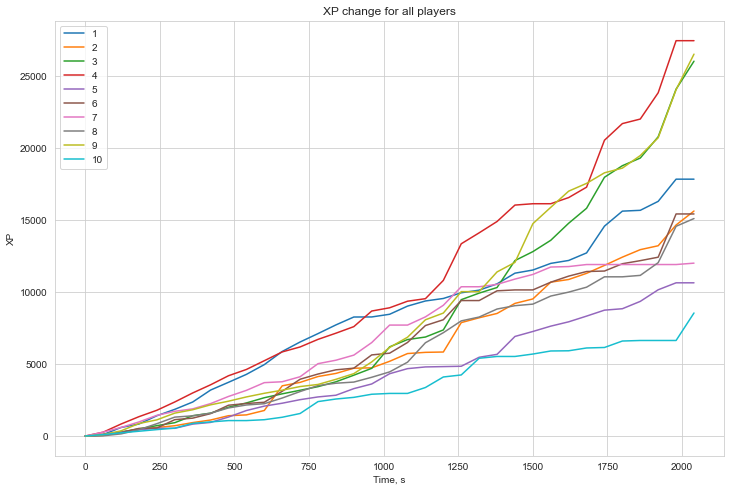

In [34]:
for i, player in enumerate(match["players"]):
    plt.plot(player["times"], player["xp_t"], label=str(i+1))

plt.legend()
plt.xlabel("Time, s")
plt.ylabel("XP")
plt.title("XP change for all players");

#### Сделаем чтение файла с сырыми данными и добавление новых признаков удобным

В этот раз для чтение `json` файлов лучше использовать библиотеку `ujson`, иначе все будет слишком долго :(

In [26]:
from tqdm.notebook import tqdm
import ujson as json
import os
matches_file = os.path.join("D:\JOB\python\dota_competitions", 
                                             "train_raw_data.jsonl")
#number of matches = 31698
def read_matches(matches_file, total_matches=31698, n_matches_to_read=None):
    """
    Аргуент
    -------
    matches_file: JSON файл с сырыми данными
    
    Результат
    ---------
    Возвращает записи о каждом матче
    """
    
    if n_matches_to_read is None:
        n_matches_to_read = total_matches
        
    c = 0
    with open(matches_file) as fin:
        for line in tqdm(fin, total=total_matches):
            if c >= n_matches_to_read:
                break
            else:
                c += 1
                yield json.loads(line)

#### Чтение данных в цикле

Чтение всех данных занимает 1-2 минуты, поэтому для начала можно попробовать следующее:

1. Читать 10-50 игр
2. Написать код для работы с этими JSON объектами
3. Убедиться, что все работает
4. Запустить код на всем датасете
5. Сохранить результат в `pickle` файл, чтобы в следующий раз не переделывать все заново

## <left>Feature engineering

Напишем функцию, которая поможет нам легче добавлять новые признаки.

In [27]:
def add_new_features(df_features, matches_file):
    """
    Аргументы
    -------
    df_features: таблица с данными
    matches_file: JSON файл с сырыми данными
    
    Результат
    ---------
    Добавляет новые признаки в таблицу
    """
    
    for match in read_matches(matches_file,n_matches_to_read=31698):
        match_id_hash = match['match_id_hash']

        # Посчитаем количество разрушенных вышек обеими командами
        radiant_tower_kills = 0
        dire_tower_kills = 0
        for objective in match["objectives"]:
            if objective["type"] == "CHAT_MESSAGE_TOWER_KILL":
                if objective["team"] == 2:
                    radiant_tower_kills += 1
                if objective["team"] == 3:
                    dire_tower_kills += 1

        df_features.loc[match_id_hash, "radiant_tower_kills"] = radiant_tower_kills
        df_features.loc[match_id_hash, "dire_tower_kills"] = dire_tower_kills
        df_features.loc[match_id_hash, "diff_tower_kills"] = radiant_tower_kills - dire_tower_kills
        
        # Урон нанесенный героем за всю игру (полученный урон не сохраняла)
        for player_number in range(10):
            damage_hero = 0
            damage_received = 0
            i = 0
            if player_number < 5:
                team_type = 'r'
            else:
                team_type = 'd'
            for damage_dict in match['players'][player_number]['damage']:
                if damage_dict[0:13] == 'npc_dota_hero':
                    damage_hero += list(match['players'][player_number]['damage'].values())[i]
                i += 1
            i = 0
            for damage_dict in match['players'][player_number]['damage_taken']:
                if damage_dict[0:13] == 'npc_dota_hero':
                    damage_received += list(match['players'][player_number]['damage_taken'].values())[i]
                i += 1            
            name_player_damage = team_type + str(player_number) + '_dam'
            df_features.loc[match_id_hash, name_player_damage] = damage_hero
            #name_player_damage_rec = team_type + str(player_number) + '_dam_rec'
            #df_features.loc[match_id_hash, name_player_damage_rec] = damage_received
        
        #разница прироста xp, gold в конце игры, а также разница xp/gold за последнее сражение
        l_teamfight_g_diff = 0
        l_teamfight_xp_diff = 0
        count_l_teamfight = 0
        team_div_gold_diff = 0
        team_div_xp_diff = 0
        for j in 'rd':
            for i in range(5):
                if j == 'r':
                    try:
                        l_teamfight_g_diff += match['teamfights'][-1]['players'][count_l_teamfight]['gold_delta']
                        l_teamfight_xp_diff += match['teamfights'][-1]['players'][count_l_teamfight]['xp_delta']
                        team_div_gold_diff += match['players'][count_l_teamfight]['gold_t'][-1]-match['players'][count_l_teamfight]['gold_t'][-3]
                        team_div_xp_diff += match['players'][count_l_teamfight]['xp_t'][-1]-match['players'][count_l_teamfight]['xp_t'][-3]

                    except:
                        l_teamfight_g_diff += 0
                        l_teamfight_xp_diff += 0
                else:
                    try:
                        l_teamfight_g_diff -= match['teamfights'][-1]['players'][count_l_teamfight]['gold_delta']
                        l_teamfight_xp_diff -= match['teamfights'][-1]['players'][count_l_teamfight]['xp_delta']
                        team_div_gold_diff -= match['players'][count_l_teamfight]['gold_t'][-1]-match['players'][count_l_teamfight]['gold_t'][-3]
                        team_div_xp_diff -= match['players'][count_l_teamfight]['xp_t'][-1]-match['players'][count_l_teamfight]['xp_t'][-3]

                    except:
                        l_teamfight_g_diff -= 0
                        l_teamfight_xp_diff -= 0
                        team_div_gold_diff -= 0
                        team_div_xp_diff -= 0
                count_l_teamfight += 1
        df_features.loc[match_id_hash, 'l_teamfight_g_diff'] = l_teamfight_g_diff
        df_features.loc[match_id_hash, 'l_teamfight_xp_diff'] = l_teamfight_xp_diff
        df_features.loc[match_id_hash, 'team_div_gold_diff'] = team_div_gold_diff
        df_features.loc[match_id_hash, 'team_div_xp_diff'] = team_div_xp_diff
        
        # ... (/¯◡ ‿ ◡)/¯☆*:・ﾟ добавляем новые признаки ...

In [28]:
# Скопируем таблицу с признаками
df_train_features_extended = df_train_features.copy()

# Добавим новые
add_new_features(df_train_features_extended, 
                 os.path.join(PATH_TO_DATA, 
                              "train_raw_data.jsonl"))

  0%|          | 0/31698 [00:00<?, ?it/s]

In [29]:
df_train_features_extended

,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,r1_gold,r1_lh,r1_xp,r1_health,r1_max_health,r1_max_mana,r1_level,r1_x,r1_y,r1_stuns,r1_creeps_stacked,r1_camps_stacked,r1_rune_pickups,r1_firstblood_claimed,r1_teamfight_participation,r1_towers_killed,r1_roshans_killed,r1_obs_placed,r1_sen_placed,r2_hero_id,r2_kills,r2_deaths,r2_assists,r2_denies,r2_gold,r2_lh,r2_xp,r2_health,r2_max_health,r2_max_mana,r2_level,r2_x,r2_y,r2_stuns,r2_creeps_stacked,r2_camps_stacked,r2_rune_pickups,r2_firstblood_claimed,r2_teamfight_participation,r2_towers_killed,r2_roshans_killed,r2_obs_placed,r2_sen_placed,r3_hero_id,r3_kills,r3_deaths,r3_assists,r3_denies,r3_gold,r3_lh,r3_xp,r3_health,r3_max_health,r3_max_mana,r3_level,r3_x,r3_y,r3_stuns,r3_creeps_stacked,r3_camps_stacked,r3_rune_pickups,r3_firstblood_claimed,r3_teamfight_participation,r3_towers_killed,r3_roshans_killed,r3_obs_placed,r3_sen_placed,r4_hero_id,r4_kills,r4_deaths,r4_assists,r4_denies,r4_gold,r4_lh,r4_xp,r4_health,r4_max_health,r4_max_mana,r4_level,r4_x,r4_y,r4_stuns,r4_creeps_stacked,r4_camps_stacked,r4_rune_pickups,r4_firstblood_claimed,r4_teamfight_participation,r4_towers_killed,r4_roshans_killed,r4_obs_placed,r4_sen_placed,r5_hero_id,r5_kills,r5_deaths,r5_assists,r5_denies,r5_gold,r5_lh,r5_xp,r5_health,r5_max_health,r5_max_mana,r5_level,r5_x,r5_y,r5_stuns,r5_creeps_stacked,r5_camps_stacked,r5_rune_pickups,r5_firstblood_claimed,r5_teamfight_participation,r5_towers_killed,r5_roshans_killed,r5_obs_placed,r5_sen_placed,d1_hero_id,d1_kills,d1_deaths,d1_assists,d1_denies,d1_gold,d1_lh,d1_xp,d1_health,d1_max_health,d1_max_mana,d1_level,d1_x,d1_y,d1_stuns,d1_creeps_stacked,d1_camps_stacked,d1_rune_pickups,d1_firstblood_claimed,d1_teamfight_participation,d1_towers_killed,d1_roshans_killed,d1_obs_placed,d1_sen_placed,d2_hero_id,d2_kills,d2_deaths,d2_assists,d2_denies,d2_gold,d2_lh,d2_xp,d2_health,d2_max_health,d2_max_mana,d2_level,d2_x,d2_y,d2_stuns,d2_creeps_stacked,d2_camps_stacked,d2_rune_pickups,d2_firstblood_claimed,d2_teamfight_participation,d2_towers_killed,d2_roshans_killed,d2_obs_placed,d2_sen_placed,d3_hero_id,d3_kills,d3_deaths,d3_assists,d3_denies,d3_gold,d3_lh,d3_xp,d3_health,d3_max_health,d3_max_mana,d3_level,d3_x,d3_y,d3_stuns,d3_creeps_stacked,d3_camps_stacked,d3_rune_pickups,d3_firstblood_claimed,d3_teamfight_participation,d3_towers_killed,d3_roshans_killed,d3_obs_placed,d3_sen_placed,d4_hero_id,d4_kills,d4_deaths,d4_assists,d4_denies,d4_gold,d4_lh,d4_xp,d4_health,d4_max_health,d4_max_mana,d4_level,d4_x,d4_y,d4_stuns,d4_creeps_stacked,d4_camps_stacked,d4_rune_pickups,d4_firstblood_claimed,d4_teamfight_participation,d4_towers_killed,d4_roshans_killed,d4_obs_placed,d4_sen_placed,d5_hero_id,d5_kills,d5_deaths,d5_assists,d5_denies,d5_gold,d5_lh,d5_xp,d5_health,d5_max_health,d5_max_mana,d5_level,d5_x,d5_y,d5_stuns,d5_creeps_stacked,d5_camps_stacked,d5_rune_pickups,d5_firstblood_claimed,d5_teamfight_participation,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed,radiant_tower_kills,dire_tower_kills,diff_tower_kills,r0_dam,r1_dam,r2_dam,r3_dam,r4_dam,d5_dam,d6_dam,d7_dam,d8_dam,d9_dam,l_teamfight_g_diff,l_teamfight_xp_diff,team_div_gold_diff,team_div_xp_diff
match_id_hash,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
b9c57c450ce74a2af79c9ce96fac144d,658,4,0,3,10,15,7,2,0,7,5257,52,3937,1160,1160,566.93805,8,76,78,0.000000,0,0,0,0,0.437500,0,0,0,0,96,3,1,2,3,3394,19,3897,1352,1380,386.93787,8,78,166,8.397949,0,0,4,0,0.312500,0,0,0,0,27,1,1,4,2,2212,4,2561,710,860,530.93800,6,156,146,11.964951,2,1,4,0,0.312500,0,0,3,1,63,4,0,3,12,4206,38,4459,420,880,482.93796,9,154,148,0.000000,0,0,3,0,0.437500,0,0,1,2,89,1,0,5,4,3103,14,2712,856,900,446.93793,6,150,148,21.697395,0,0,2,0,0.375000,1,0,0,0,58,1,2,0,4

In [31]:
rf_model = RandomForestClassifier(n_estimators=300, max_depth=7, n_jobs=-1, random_state=SEED)
cv_scores_base = cross_val_score(rf_model, X, y, cv=cv, scoring="roc_auc", n_jobs=-1)
cv_scores_extended = cross_val_score(rf_model, df_train_features_extended.values, y, 
                                     cv=cv, scoring="roc_auc", n_jobs=-1)
print(f"ROC-AUC на кросс-валидации для базовых признаков: {cv_scores_base.mean()}")
print(f"ROC-AUC на кросс-валидации для новых признаков: {cv_scores_extended.mean()}")

ROC-AUC на кросс-валидации для базовых признаков: 0.7720210676055513
ROC-AUC на кросс-валидации для новых признаков: 0.7846296101142135


Эффективность модели повысилось, но совсем не значительно.
Я решила попробовать несколько другую идею. 
В наших данных большое количество признаков, и многие из них коррелируют друг с другом и некоторые незначительные.
Я подумала, какие параметры могут иметь наибольший вклад в вероятность победы одной из команд, и создала новый уменьшенный датафрейм.

In [42]:
df_few = pd.DataFrame()
networth_diff = 0
exp_diff = 0
l_teamfight_g_diff = 0
l_teamfight_xp_diff = 0
count_l_teamfight = 0
team_div_gold_diff = 0
team_div_xp_diff = 0
for j in 'rd':
    for i in range(5):
        kda_p = j+str(i+1)+'_kda'
        p_kills = j+str(i+1)+'_kills'
        p_assist = j+str(i+1)+'_assists'
        p_death = j+str(i+1)+'_deaths'
        p_gold = j+str(i+1)+'_gold'
        p_exp = j+str(i+1)+'_xp'
        p_f = j+str(i+1)+'_teamfight_participation'
        if j == 'r':
            networth_diff += df_train_features_extended[p_gold]
            exp_diff += df_train_features_extended[p_exp]
        else:
            networth_diff += -df_train_features_extended[p_gold]
            exp_diff += -df_train_features_extended[p_exp]
        count_l_teamfight += 1
        df_few[p_f] = df_train_features_extended[p_f]
        df_train_features_extended.loc[df_train_features_extended[p_death] == 0, p_death] = 1
        df_few[kda_p] = (df_train_features_extended[p_kills]+df_train_features_extended[p_assist])/(df_train_features_extended[p_death]+1)
        
df_few['networth_diff'] = networth_diff
df_few['exp_diff'] = exp_diff
df_few['diff_tower_kills'] = df_train_features_extended['diff_tower_kills']
df_few['l_teamfight_g_diff'] = df_train_features_extended['l_teamfight_g_diff']
df_few['l_teamfight_xp_diff'] = df_train_features_extended['l_teamfight_xp_diff']
df_few['team_div_gold_diff'] = df_train_features_extended['team_div_gold_diff']
df_few['team_div_xp_diff'] = df_train_features_extended['team_div_xp_diff']


В датафрейм записаны следующие характеристики:
- Разница по опыту и золоту между коммандами
- Участие в убийствах врагов каждого игрока
- Разница по разрушенным башням
- КДА игроков
- Кто выиграл последнее сражение (разница в опыте и золоте за него)
- Кто больше получил денег и опыта в конце игры за некоторый промежуток времени

In [43]:
df_few

,r1_teamfight_participation,r1_kda,r2_teamfight_participation,r2_kda,r3_teamfight_participation,r3_kda,r4_teamfight_participation,r4_kda,r5_teamfight_participation,r5_kda,d1_teamfight_participation,d1_kda,d2_teamfight_participation,d2_kda,d3_teamfight_participation,d3_kda,d4_teamfight_participation,d4_kda,d5_teamfight_participation,d5_kda,networth_diff,exp_diff,diff_tower_kills,l_teamfight_g_diff,l_teamfight_xp_diff,team_div_gold_diff,team_div_xp_diff
match_id_hash,,,,,,,,,,,,,,,,,,,,,,,,,,,
b9c57c450ce74a2af79c9ce96fac144d,0.437500,2.333333,0.312500,2.500000,0.312500,2.500000,0.437500,3.500000,0.375000,3.000000,0.250000,0.333333,0.250000,0.142857,0.500000,0.500000,0.500000,0.500000,0.000000,0.000000,5028,4641,2.0,77.0,1580.0,1286.0,1371.0
6db558535151ea18ca70a6892197db41,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,400,0,0.0,0.0,0.0,0.0,0.0
19c39fe2af2b547e48708ca005c6ae74,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1104,429,0.0,0.0,0.0,0.0,0.0
c96d629dc0c39f0c616d1949938a6ba6,0.300000,0.750000,0.800000,1.333333,0.200000,1.000000,0.400000,2.000000,0.400000,1.333333,0.333333,0.800000,0.333333,2.000000,0.583333,2.333333,0.500000,1.500000,0.250000,1.500000,2831,-1225,0.0,1211.0,912.0,-105.0,-227.0
156c88bff4e9c4668b0f53df3d870f1b,0.833333,2.500000,0.500000,0.428571,0.666667,2.000000,0.166667,0.500000,0.000000,0.000000,0.600000,3.000000,0.200000,0.666667,0.500000,2.500000,0.200000,1.000000,0.500000,1.666667,-790,-554,-1.0,399.0,1029.0,-382.0,218.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b794aa55646841a03c7783226e6f6bc8,0.580645,1.500000,0.645161,1.818182,0.483871,1.666667,0.645161,2.857143,0.548387,2.428571,0.560976,1.352941,0.731707,3.444444,0.634146,13.000000,0.682927,4.666667,0.390244,3.200000,-13706,-10136,-4.0,-4019.0,-2379.0,70.0,2437.0
308faee28efee2e66b39f9f2ba6ea9cf,0.629630,1.700000,0.370370,1.571429,0.370370,5.000000,0.555556,7.500000,0.370370,2.500000,0.368421,1.750000,0.421053,1.142857,0.631579,1.200000,0.052632,0.250000,0.263158,0.625000,12231,18717,2.0,105.0,801.0,1708.0,661.0
6066cc7417b43c749d551e123d00f0c8,0.285714,0.666667,0.428571,0.600000,0.428571,0.428571,0.571429,1.000000,0.714286,1.250000,0.444444,4.000000,0.277778,2.500000,0.555556,3.333333,0.666667,2.400000,0.555556,5.000000,-4448,-4359,1.0,-1518.0,-1984.0,-2200.0,-2504.0


Самыми важными кажутся networth_diff, exp_diff, diff_tower_kills. Составим из них таблицу и посчитаем модель.

In [34]:
df_few2 = df_few[{'networth_diff','exp_diff','diff_tower_kills'}]
df_few2

,exp_diff,networth_diff,diff_tower_kills
match_id_hash,,,
b9c57c450ce74a2af79c9ce96fac144d,4641,5028,2.0
6db558535151ea18ca70a6892197db41,0,400,0.0
19c39fe2af2b547e48708ca005c6ae74,429,1104,0.0
c96d629dc0c39f0c616d1949938a6ba6,-1225,2831,0.0
156c88bff4e9c4668b0f53df3d870f1b,-554,-790,-1.0
...,...,...,...
b794aa55646841a03c7783226e6f6bc8,-10136,-13706,-4.0
308faee28efee2e66b39f9f2ba6ea9cf,18717,12231,2.0
6066cc7417b43c749d551e123d00f0c8,-4359,-4448,1.0


In [35]:
rf_model = RandomForestClassifier(n_estimators=300, max_depth=7, n_jobs=-1, random_state=SEED)
cv_scores_base = cross_val_score(rf_model, X, y, cv=cv, scoring="roc_auc", n_jobs=-1)
cv_scores_extended = cross_val_score(rf_model, df_few2.values, y, 
                                     cv=cv, scoring="roc_auc", n_jobs=-1)
print(f"ROC-AUC на кросс-валидации для базовых признаков: {cv_scores_base.mean()}")
print(f"ROC-AUC на кросс-валидации для новых признаков: {cv_scores_extended.mean()}")


ROC-AUC на кросс-валидации для базовых признаков: 0.7720210676055513
ROC-AUC на кросс-валидации для новых признаков: 0.8122076469685819


Модель стала заметно лучше считать, попробуем остальные признаки, которые мы добавили раньше.

In [44]:
rf_model = RandomForestClassifier(n_estimators=300, max_depth=7, n_jobs=-1, random_state=SEED)
cv_scores_base = cross_val_score(rf_model, X, y, cv=cv, scoring="roc_auc", n_jobs=-1)
cv_scores_extended = cross_val_score(rf_model, df_few.values, y, 
                                     cv=cv, scoring="roc_auc", n_jobs=-1)
print(f"ROC-AUC на кросс-валидации для базовых признаков: {cv_scores_base.mean()}")
print(f"ROC-AUC на кросс-валидации для новых признаков: {cv_scores_extended.mean()}")

ROC-AUC на кросс-валидации для базовых признаков: 0.7720210676055513
ROC-AUC на кросс-валидации для новых признаков: 0.8125981402114875


Разница совсем незначительная. Попробуем теперь посмотреть на параметры леса и попробуем LogisticRegression на расширенных данных.

In [50]:
# max depth and n_estimators
for max_depth in range(1,10,1):
    rf_model = RandomForestClassifier(n_estimators=300, max_depth=max_depth, n_jobs=-1, random_state=SEED)
    cv_scores_base = cross_val_score(rf_model, X, y, cv=cv, scoring="roc_auc", n_jobs=-1)
    cv_scores_extended = cross_val_score(rf_model, df_few.values, y, 
                                         cv=cv, scoring="roc_auc", n_jobs=-1)
    print(f"ROC-AUC на кросс-валидации для базовых признаков: {cv_scores_base.mean()}")
    print(f"ROC-AUC на кросс-валидации для новых признаков: {cv_scores_extended.mean()}")
    print(f"Глубина: {max_depth}")
for n_estimators in [1,5,10,20,50,100,300]:
    rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=7, n_jobs=-1, random_state=SEED)
    cv_scores_base = cross_val_score(rf_model, X, y, cv=cv, scoring="roc_auc", n_jobs=-1)
    cv_scores_extended = cross_val_score(rf_model, df_few.values, y, 
                                         cv=cv, scoring="roc_auc", n_jobs=-1)
    print(f"ROC-AUC на кросс-валидации для базовых признаков: {cv_scores_base.mean()}")
    print(f"ROC-AUC на кросс-валидации для новых признаков: {cv_scores_extended.mean()}")
    print(f"n_estimators: {n_estimators}")

ROC-AUC на кросс-валидации для базовых признаков: 0.7260810936743498
ROC-AUC на кросс-валидации для новых признаков: 0.7822963770788002
Глубина: 1
ROC-AUC на кросс-валидации для базовых признаков: 0.7411338361650669
ROC-AUC на кросс-валидации для новых признаков: 0.8059153422664131
Глубина: 2
ROC-AUC на кросс-валидации для базовых признаков: 0.747260104508159
ROC-AUC на кросс-валидации для новых признаков: 0.807913137348758
Глубина: 3
ROC-AUC на кросс-валидации для базовых признаков: 0.7562607854685861
ROC-AUC на кросс-валидации для новых признаков: 0.8097973624601653
Глубина: 4
ROC-AUC на кросс-валидации для базовых признаков: 0.7628703649330142
ROC-AUC на кросс-валидации для новых признаков: 0.8110821533634734
Глубина: 5
ROC-AUC на кросс-валидации для базовых признаков: 0.7679203847382781
ROC-AUC на кросс-валидации для новых признаков: 0.8119690463369246
Глубина: 6
ROC-AUC на кросс-валидации для базовых признаков: 0.7720210676055513
ROC-AUC на кросс-валидации для новых признаков: 0.8

Оптимальная глубина >=7, n_estimators>= 100

In [48]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
rf_model = LogisticRegression()
cv_scores_base = cross_val_score(rf_model, X, y, cv=cv, scoring="roc_auc", n_jobs=-1)
cv_scores_extended = cross_val_score(rf_model, df_few.values, y, 
                                     cv=cv, scoring="roc_auc", n_jobs=-1)
print(f"ROC-AUC на кросс-валидации для базовых признаков: {cv_scores_base.mean()}")
print(f"ROC-AUC на кросс-валидации для новых признаков: {cv_scores_extended.mean()}")

ROC-AUC на кросс-валидации для базовых признаков: 0.8077948335234802
ROC-AUC на кросс-валидации для новых признаков: 0.8078574973970495


Работает чуть хуже деревьев

### Наилучший результат получился для леса: 0.813.